Сгенерируем выборку из стандартного нормального распределения для $N = 10**4$. Для всех $n \leq N$ посчитаем по ней эмпирическую функцию распределения.

In [1]:
# Импортируем нужные библиотеки
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import math
# Функция для построения эмпирического распределения.
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

In [2]:
# Функция, генерирующая выборку и возвращающая выборку и эмпирическую функцию распределения.
def get_sample_F(N=10**4):
    sample = stats.norm.rvs(size=N)
    empirical_distribution = []
    # Начинаем отсчет с единицы, чтобы работала функция ECDF.
    for n in range(1,N):
        empirical_distribution.append(ECDF(sample[:n]))
    # Продублируем последний элемент, чтобы размер массива был равен N.
    empirical_distribution.append(empirical_distribution[N-2])
    return sample, empirical_distribution

In [3]:
sample, empirical_distr = get_sample_F()

Для некоторых $n$ построим графики эмпирической функции распределения, нанеся на каждый из них истинную функцию распределения.

Отметим на оси абсцисс точки “скачков” кривых, нанеся каждую из “подвыборок” на ось абсцисс на каждом соответствующем графике
с коэффициентом прозрачности 0.2. 

In [4]:
# Функция для построения такого графика.
def get_graph(n):
    # Координаты для оси абсцисс.
    grid = np.linspace(-10, 10, 1000)
    # Строим график.
    plt.figure(figsize=(10, 7))
    plt.xlabel("x")
    plt.ylabel(r"distribution function value")
    # Отмечаем точки скачков.
    plt.scatter(sample[:n], np.zeros(n), alpha=0.2, color="r", label="sample with" + str(n) + "points")
    # Наносим график истинной функции распределения.
    plt.plot(grid, stats.norm.cdf(grid), color='g', label=r'real distribution function')
    # Рисуем график эмпирической функции распределения.
    plt.plot(grid, empirical_distr[n - 1](grid), color='b', label=r'empirical distribution function')
    plt.title(r'Real and empirical distribution functions', fontsize=10)
    plt.legend(fontsize=10, loc=2)
    # Ограничиваем график по оси абсцисс.
    plt.xlim([-10, 10])
    plt.show()

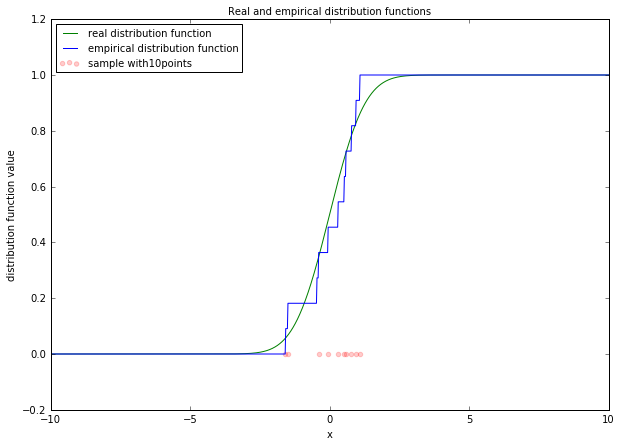

In [26]:
get_graph(10)

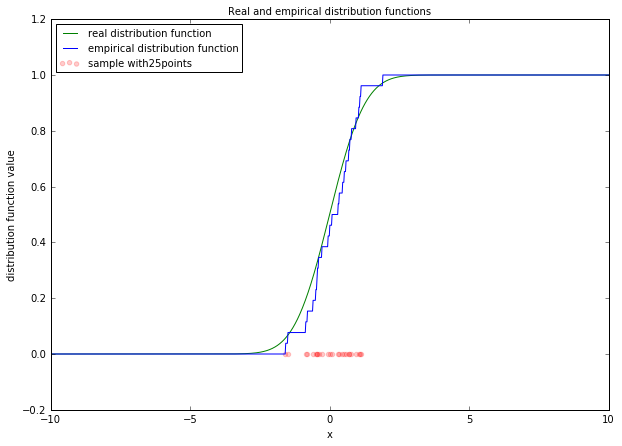

In [27]:
get_graph(25)

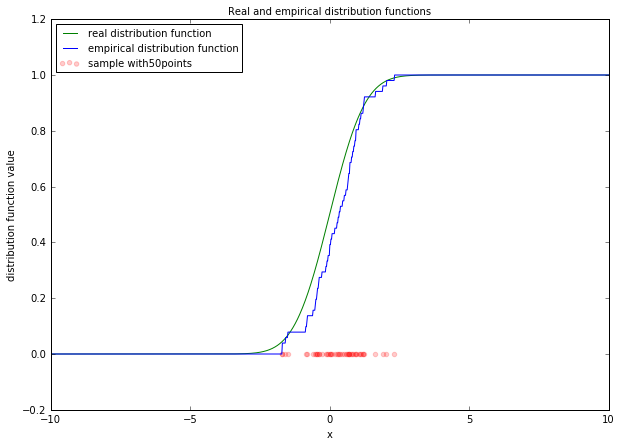

In [28]:
get_graph(50)

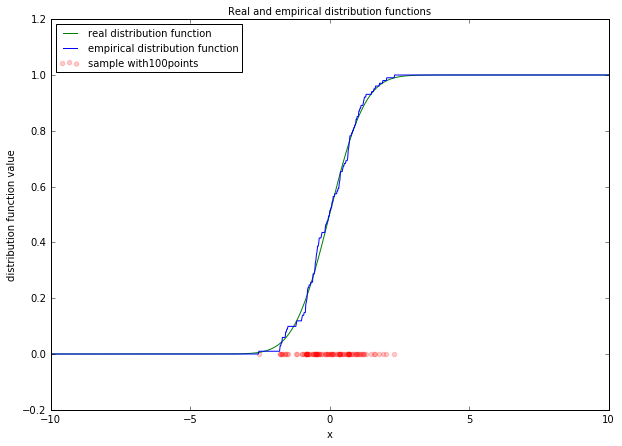

In [29]:
get_graph(100)

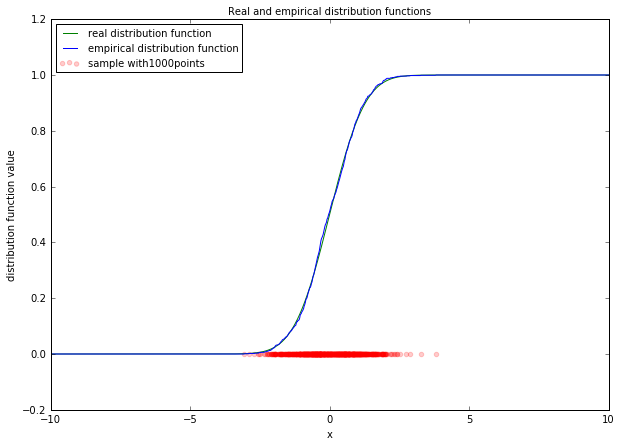

In [30]:
get_graph(1000)

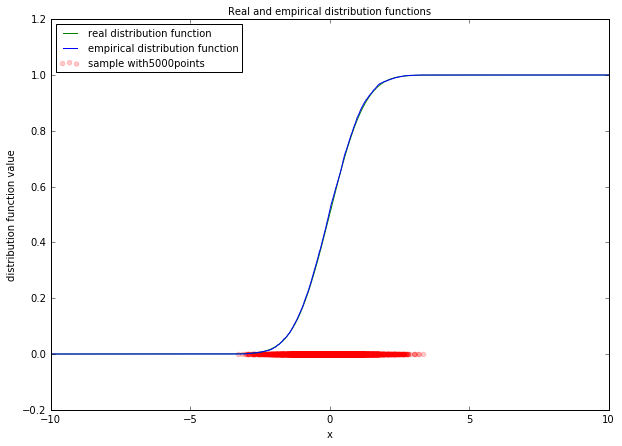

In [21]:
get_graph(5000)

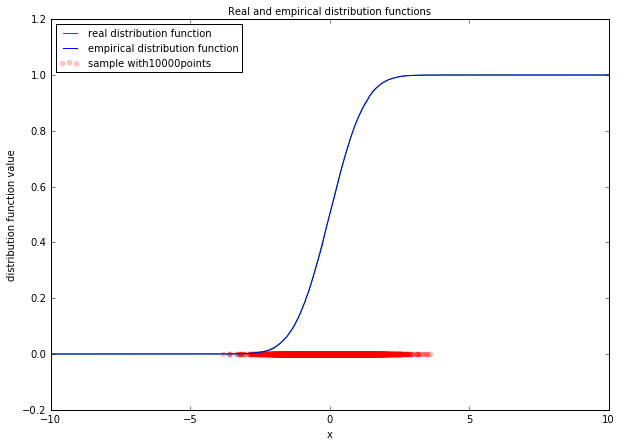

In [45]:
get_graph(10000)

Для всех $n \leq N$ посчитаем точное значение  $D_n = \sup_{x \in \Re}  |{F_n (x) - F(x)}|$ и построим график зависимости 
статистик $D_n$ и $\sqrt{n}D_n$ от $n$.

In [66]:
# Функция считающая D_n
def get_D_n(N=10**4):
    # Мы оцениваем разность значениями монотонной и кусочно постоянной функцией.
    # Значит, можно смотреть только на разности в точках разрыва эмпирической функции распределения.
    D_n=np.zeros(N)
    for n in range(1, N):
        # Очевидно, что все разрывы эмпирической функции распределения находятся среди значений sample.
        D_n[n] = np.max(np.abs(empirical_distr[n](sample[:n]) - stats.norm.cdf(sample[:n])))
    return D_n

In [72]:
# Функция строит зависимости указанных статистик от n
def get_estimates_plt(N=10**4):
    D_n = get_D_n()
    # Вторая статистика.
    sqrt_D_n = D_n
    for i in range(N):
        sqrt_D_n[i] *= np.sqrt(i + 1)
    # Строим график для D_n.
    plt.figure(figsize=(10, 7))
    plt.xlabel("n")
    plt.ylabel(r"estimates")
    plt.plot(range(N), D_n, color='b', label=r"$D_n$")
    plt.title(r'Estimate $D_n = \sup_{x \in \Re}  |{F_n (x) - F(x)}|$', fontsize=14)
    plt.legend(fontsize=14, loc=2)
    plt.show()
    
    # Строим график для sqrt_D_n.
    plt.figure(figsize=(10, 7))
    plt.xlabel("n")
    plt.ylabel(r"estimates")
    plt.plot(range(N), sqrt_D_n, color='r', label=r"$\sqrt{n}D_n$")
    plt.title(r'Estimate $\sqrt{n}D_n$', fontsize=14)
    plt.legend(fontsize=10, loc=2)
    plt.show()

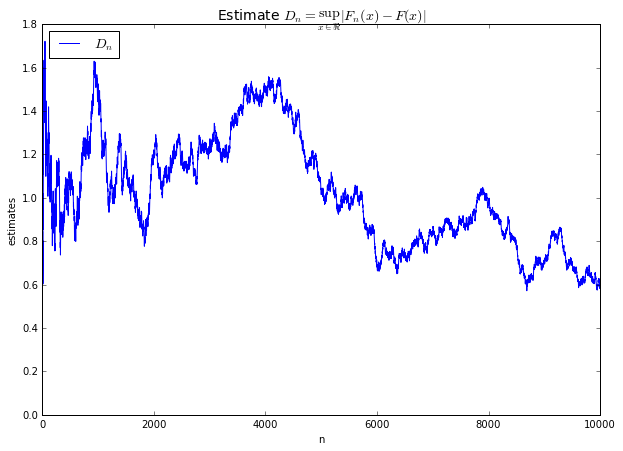

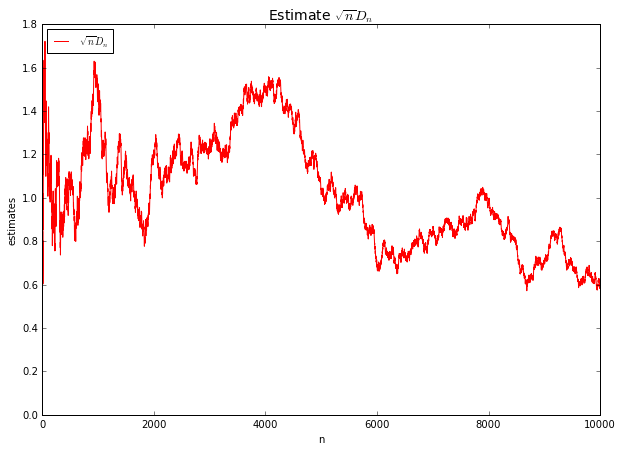

In [73]:
get_estimates_plt()

#### Вывод.
Мы увидели, что эмперическая функция распределения при достаточно большом объеме выборки $n \geq 1000$ очень хорошо приближает реальную функцию распределения.

Также видна сходимость статистик $D_n = \sup_{x \in \Re}  |{F_n (x) - F(x)}|$ и $\sqrt{n}D_n$ к нулю.
